In [ ]:
# Observation 1:

# It does indeed get hotter overall as you move towards the equater. 


# Observation 2:

# Temperature trends in the southern hemisphere appear to be milder. 
# Although we are at the turn of seasons (i.e. Autumn and Spring), the temperature trends in the
# northern hemisphere are far more pronounced. 


# Observation 3:

# Humidity seems to increase as you move away from the equator. 
# Potentially this could contradict how "hot" it feels, but temperature changes would offset this. 


# Observation 4:

# It seems to be sunnier closer to the equator, and cloudiness rises towards the poles. 

In [1]:
from config import gkey
from config import weatherkey
from citipy import citipy
import numpy as np
import pandas as pd
import requests
import json
from pprint import pprint
from matplotlib import pyplot as plt
from scipy import stats
import os

In [2]:
# create dataframe 
City_df = pd.DataFrame()
header_list = ['City','Country','Lattitude','Longitude','Temperature C','Temperature F','Humidity %','Cloudiness %','Wind Speed (mph)']
City_df = City_df.reindex(columns = header_list)
City_df['City']= City_df['City'].astype(str)
City_df['Country']= City_df['Country'].astype(str)


In [3]:
loopcount = 0
MaxCities = 500

savefolder = "Output/"

base_url = 'http://api.openweathermap.org/data/2.5/weather?q='
comma = ','


# start loop
while loopcount < MaxCities:
    rowlist = []
    # set random lats and longs
    rand_lat = round(np.random.uniform(-90, 90),4)
    rand_long = round(np.random.uniform(-180, 180),4)

    # get city name and counry 
    cityname = citipy.nearest_city(rand_lat,rand_long).city_name.title()
    citycountry = citipy.nearest_city(rand_lat,rand_long).country_code.upper()

    # test if city name already in list, and restart if so
    if cityname in City_df['City'].values:
        print(f'{cityname} is a Duplicate City, Skipping.')
        continue
        
    # generate url and hit API 
    full_url = base_url + cityname + comma + citycountry + '&appid=' + weatherkey
    response = requests.get(full_url) 
    parsed_response = response.json()
    
    # attempt to load data into DF, if city was found and values can be parsed 
    try:
        City_df.at[loopcount, 'City']  = cityname    
        City_df.at[loopcount, 'Country'] = citycountry
        City_df.at[loopcount, 'Temperature C'] = (parsed_response["main"]["temp_max"] - 273)
        City_df.at[loopcount, 'Temperature F'] = (parsed_response["main"]["temp_max"] * 1.8 - 457.6)
        City_df.at[loopcount, 'Lattitude'] = parsed_response["coord"]["lat"]
        City_df.at[loopcount, 'Longitude'] = parsed_response["coord"]["lon"]
        City_df.at[loopcount, 'Humidity %'] = parsed_response["main"]["humidity"]
        City_df.at[loopcount, 'Cloudiness %'] = parsed_response["clouds"]["all"]
        City_df.at[loopcount, 'Wind Speed (mph)'] = (parsed_response["wind"]["speed"] * 2.24)
        print('City found: ' + cityname + ", " + citycountry + ", #" + str(loopcount))
        loopcount = loopcount + 1
    except:
        print('City ' + cityname + ' not found in API! Skipping.')

# Save and output dataframe to screen
City_df.to_csv(savefolder + 'City Weather Data.csv')  
City_df.head(50)

City found: Jian, CN, #0
City found: French Harbor, HN, #1
City found: Yellowknife, CA, #2
City found: Cairns, AU, #3
City found: Ushuaia, AR, #4
City found: Saint-Philippe, RE, #5
City Grand River South East not found in API! Skipping.
City found: Prince Rupert, CA, #6
City found: New Norfolk, AU, #7
City found: Bluff, NZ, #8
City found: Arraial Do Cabo, BR, #9
City found: Hermanus, ZA, #10
City found: Weligama, LK, #11
City found: Rikitea, PF, #12
City found: Iralaya, HN, #13
City found: Irbeyskoye, RU, #14
City found: Hilo, US, #15
City found: Cape Town, ZA, #16
City found: Kapaa, US, #17
City found: Grindavik, IS, #18
Hermanus is a Duplicate City, Skipping.
Rikitea is a Duplicate City, Skipping.
City found: Kahului, US, #19
City found: Sitka, US, #20
City found: Busselton, AU, #21
City found: Atuona, PF, #22
City found: Chlorakas, CY, #23
City found: Meulaboh, ID, #24
City found: Qaanaaq, GL, #25
City found: Esperance, AU, #26
City found: Kuandian, CN, #27
City found: Bonavista, CA

City found: Saskylakh, RU, #132
City Taolanaro not found in API! Skipping.
Ushuaia is a Duplicate City, Skipping.
City Saleaula not found in API! Skipping.
Grand Gaube is a Duplicate City, Skipping.
City found: Tiksi, RU, #133
Kaitangata is a Duplicate City, Skipping.
City Samusu not found in API! Skipping.
West Wendover is a Duplicate City, Skipping.
Dikson is a Duplicate City, Skipping.
City found: Ngama, TD, #134
Hilo is a Duplicate City, Skipping.
City found: Jamame, SO, #135
City found: Pevek, RU, #136
Punta Arenas is a Duplicate City, Skipping.
Bambous Virieux is a Duplicate City, Skipping.
City found: Cockburn Town, BS, #137
Rikitea is a Duplicate City, Skipping.
Prince Rupert is a Duplicate City, Skipping.
Albany is a Duplicate City, Skipping.
Jamestown is a Duplicate City, Skipping.
City found: Mount Gambier, AU, #138
Busselton is a Duplicate City, Skipping.
Hilo is a Duplicate City, Skipping.
City Attawapiskat not found in API! Skipping.
Kaitangata is a Duplicate City, Skippi

City found: Iracoubo, GF, #218
City found: Tomatlan, MX, #219
City Duz not found in API! Skipping.
City found: Luanda, AO, #220
City found: Scalea, IT, #221
City found: Methoni, GR, #222
City found: Saint-Georges, GF, #223
Dikson is a Duplicate City, Skipping.
Busselton is a Duplicate City, Skipping.
City found: Manjacaze, MZ, #224
City found: Antofagasta, CL, #225
Cidreira is a Duplicate City, Skipping.
City found: Kuching, MY, #226
City found: Dingle, IE, #227
Puerto Ayora is a Duplicate City, Skipping.
Cabo San Lucas is a Duplicate City, Skipping.
City found: Aklavik, CA, #228
East London is a Duplicate City, Skipping.
Hermanus is a Duplicate City, Skipping.
Pevek is a Duplicate City, Skipping.
City Attawapiskat not found in API! Skipping.
Bengkulu is a Duplicate City, Skipping.
Bluff is a Duplicate City, Skipping.
City found: Shakiso, ET, #229
City Ondorhaan not found in API! Skipping.
City found: Hirado, JP, #230
Tuktoyaktuk is a Duplicate City, Skipping.
City found: Makakilo City

City found: Letterkenny, IE, #290
City Taolanaro not found in API! Skipping.
City found: Baruun-Urt, MN, #291
Vaini is a Duplicate City, Skipping.
Atuona is a Duplicate City, Skipping.
City found: Trairi, BR, #292
Hermanus is a Duplicate City, Skipping.
Thompson is a Duplicate City, Skipping.
City found: Palic, RS, #293
Rikitea is a Duplicate City, Skipping.
City found: Goundam, ML, #294
City found: Conde, BR, #295
Jamestown is a Duplicate City, Skipping.
City found: Kibondo, TZ, #296
Cabo San Lucas is a Duplicate City, Skipping.
City found: Nichinan, JP, #297
Vaini is a Duplicate City, Skipping.
City found: Bairnsdale, AU, #298
Bengkulu is a Duplicate City, Skipping.
Meulaboh is a Duplicate City, Skipping.
City found: Chama, ZM, #299
City found: Maragogi, BR, #300
City found: Tura, RU, #301
Kapaa is a Duplicate City, Skipping.
Port Alfred is a Duplicate City, Skipping.
City found: Dunedin, NZ, #302
City found: Portobelo, PA, #303
City Amderma not found in API! Skipping.
City found: Lu

City found: Cluses, FR, #377
Jieshi is a Duplicate City, Skipping.
City found: Vila Franca Do Campo, PT, #378
Albany is a Duplicate City, Skipping.
City found: Corralillo, CU, #379
Hermanus is a Duplicate City, Skipping.
Chicama is a Duplicate City, Skipping.
Ushuaia is a Duplicate City, Skipping.
Longyearbyen is a Duplicate City, Skipping.
City found: Bom Jesus, BR, #380
Mount Gambier is a Duplicate City, Skipping.
Kodiak is a Duplicate City, Skipping.
City found: Byron Bay, AU, #381
City Barentsburg not found in API! Skipping.
City Karakose not found in API! Skipping.
City Belushya Guba not found in API! Skipping.
City found: Kargasok, RU, #382
City found: Jinka, ET, #383
Yellowknife is a Duplicate City, Skipping.
Mahebourg is a Duplicate City, Skipping.
City Attawapiskat not found in API! Skipping.
City found: Verkhozim, RU, #384
City found: Zabaykalsk, RU, #385
Upernavik is a Duplicate City, Skipping.
City found: Rassvet, RU, #386
Ilulissat is a Duplicate City, Skipping.
City found

City found: Bay Roberts, CA, #435
Saint-Georges is a Duplicate City, Skipping.
Cherskiy is a Duplicate City, Skipping.
Lebu is a Duplicate City, Skipping.
Kaitangata is a Duplicate City, Skipping.
Punta Arenas is a Duplicate City, Skipping.
Namibe is a Duplicate City, Skipping.
Dikson is a Duplicate City, Skipping.
City found: Bac Lieu, VN, #436
Ushuaia is a Duplicate City, Skipping.
City Tsihombe not found in API! Skipping.
Cape Town is a Duplicate City, Skipping.
Butaritari is a Duplicate City, Skipping.
City found: Havre, US, #437
Punta Arenas is a Duplicate City, Skipping.
Sorong is a Duplicate City, Skipping.
City found: Jishou, CN, #438
Qaanaaq is a Duplicate City, Skipping.
Esperance is a Duplicate City, Skipping.
City found: Bayan, KW, #439
Nikolskoye is a Duplicate City, Skipping.
Avarua is a Duplicate City, Skipping.
Butaritari is a Duplicate City, Skipping.
City Mataura not found in API! Skipping.
Punta Arenas is a Duplicate City, Skipping.
Hithadhoo is a Duplicate City, Ski

City Felidhoo not found in API! Skipping.
Kodiak is a Duplicate City, Skipping.
Kodiak is a Duplicate City, Skipping.
City Karamea not found in API! Skipping.
Port Elizabeth is a Duplicate City, Skipping.
City found: Le Port, RE, #490
Port Hardy is a Duplicate City, Skipping.
City found: Morros, BR, #491
Longyearbyen is a Duplicate City, Skipping.
East London is a Duplicate City, Skipping.
Mar Del Plata is a Duplicate City, Skipping.
City found: Mandera, KE, #492
Camana is a Duplicate City, Skipping.
Barrow is a Duplicate City, Skipping.
City found: Denpasar, ID, #493
Bredasdorp is a Duplicate City, Skipping.
City found: Port Moresby, PG, #494
Kavieng is a Duplicate City, Skipping.
City found: Kamthi, IN, #495
City Kollumerland not found in API! Skipping.
Clyde River is a Duplicate City, Skipping.
City Fevralsk not found in API! Skipping.
City found: Nouadhibou, MR, #496
Lebu is a Duplicate City, Skipping.
City found: Linqiong, CN, #497
Bethel is a Duplicate City, Skipping.
City found:

,City,Country,Lattitude,Longitude,Temperature C,Temperature F,Humidity %,Cloudiness %,Wind Speed (mph)
0,Jian,CN,27.1172,114.9793,12.66,56.588,83.0,100.0,8.7808
1,French Harbor,HN,16.3500,-86.4333,24.04,77.072,99.0,9.0,10.9760
2,Yellowknife,CA,62.4560,-114.3525,-11.85,12.470,79.0,90.0,14.9856
3,Cairns,AU,-16.9167,145.7667,27.15,82.670,69.0,75.0,5.7568
4,Ushuaia,AR,-54.8000,-68.3000,2.15,37.670,93.0,75.0,20.7424
5,Saint-Philippe,RE,-21.3585,55.7679,30.15,88.070,62.0,0.0,28.8064
6,Prince Rupert,CA,54.3161,-130.3201,3.15,39.470,64.0,40.0,10.3712
7,New Norfolk,AU,-42.7826,147.0587,16.26,63.068,64.0,0.0,2.4640
8,Bluff,NZ,-46.6000,168.3333,14.04,59.072,84.0,45.0,4.0096
9,Arraial Do Cabo,BR,-22.9661,-42.0278,23.15,75.470,100.0,40.0,11.5136


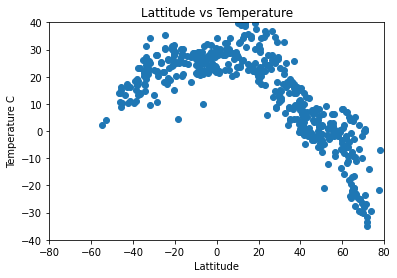

In [4]:
fig1 = plt.scatter(City_df['Lattitude'],City_df['Temperature C'])
plt.title('Lattitude vs Temperature')
plt.xlabel('Lattitude')
plt.xlim(-80, 80)
plt.ylabel('Temperature C')
plt.ylim(-40,40)
plt.show()

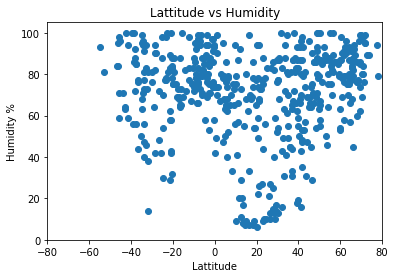

In [5]:
fig2 = plt.scatter(City_df['Lattitude'],City_df['Humidity %'])
plt.title('Lattitude vs Humidity')
plt.xlabel('Lattitude')
plt.xlim(-80, 80)
plt.ylabel('Humidity %')
plt.ylim(0,105)
plt.show()

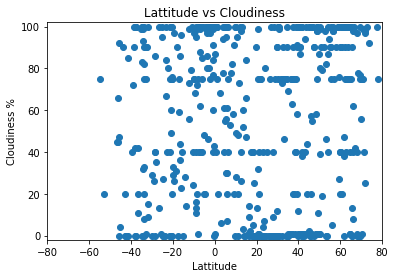

In [6]:
fig3 = plt.scatter(City_df['Lattitude'],City_df['Cloudiness %'])
plt.title('Lattitude vs Cloudiness')
plt.xlabel('Lattitude')
plt.xlim(-80, 80)
plt.ylabel('Cloudiness %')
plt.ylim(-2,102)
plt.show()

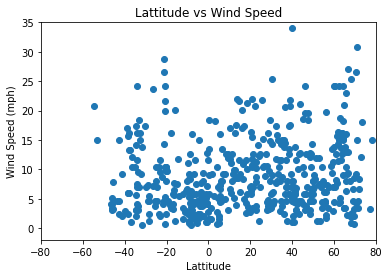

In [7]:
fig4 = plt.scatter(City_df['Lattitude'],City_df['Wind Speed (mph)'])
plt.title('Lattitude vs Wind Speed')
plt.xlabel('Lattitude')
plt.xlim(-80, 80)
plt.ylabel('Wind Speed (mph)')
plt.ylim(-2,35)
plt.show()

In [8]:
# Hemispheric Analysis Dataframes 

NorthernHemisphere_df = City_df.loc[(City_df['Lattitude'] > 0)]
SouthernHemisphere_df = City_df.loc[(City_df['Lattitude'] < 0)]



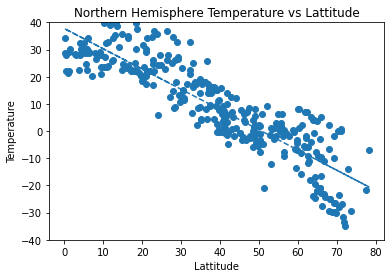

In [9]:
graph1 = plt.scatter(NorthernHemisphere_df['Lattitude'],NorthernHemisphere_df['Temperature C'])
plt.xlabel('Lattitude')
plt.ylabel('Temperature')
plt.title('Northern Hemisphere Temperature vs Lattitude')
plt.ylim(-40, 40)
g1_slope, g1_int, g1_r, g1_p, g1_std_err = stats.linregress(NorthernHemisphere_df['Lattitude'],NorthernHemisphere_df['Temperature C'])
g1_fit = g1_slope * NorthernHemisphere_df['Lattitude'] + g1_int
plt.plot(NorthernHemisphere_df['Lattitude'],g1_fit,"--")

plt.savefig(savefolder + 'Northern Hemisphere Temperature vs Lattitude.jpg', dpi = 300)

plt.show()

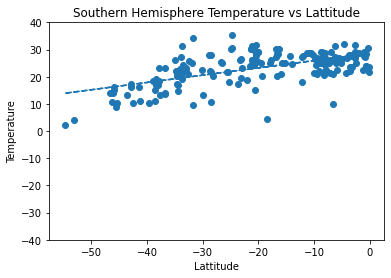

In [10]:
graph2 = plt.scatter(SouthernHemisphere_df['Lattitude'],SouthernHemisphere_df['Temperature C'])
plt.xlabel('Lattitude')
plt.ylabel('Temperature')
plt.ylim(-40, 40)
plt.title('Southern Hemisphere Temperature vs Lattitude')
g2_slope, g2_int, g2_r, g2_p, g2_std_err = stats.linregress(SouthernHemisphere_df['Lattitude'],SouthernHemisphere_df['Temperature C'])
g2_fit = g2_slope * SouthernHemisphere_df['Lattitude'] + g2_int
plt.plot(SouthernHemisphere_df['Lattitude'],g2_fit,"--")

plt.savefig(savefolder + 'Southern Hemisphere Temperature vs Lattitude.jpg', dpi = 300)

plt.show()

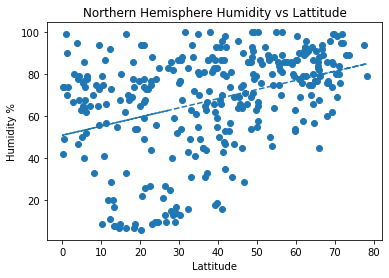

In [11]:
graph3 = plt.scatter(NorthernHemisphere_df['Lattitude'],NorthernHemisphere_df['Humidity %'])
plt.xlabel('Lattitude')
plt.ylabel('Humidity %')
plt.title('Northern Hemisphere Humidity vs Lattitude')
g3_slope, g3_int, g3_r, g3_p, g3_std_err = stats.linregress(NorthernHemisphere_df['Lattitude'],NorthernHemisphere_df['Humidity %'])
g3_fit = g3_slope * NorthernHemisphere_df['Lattitude'] + g3_int
plt.plot(NorthernHemisphere_df['Lattitude'],g3_fit,"--")

plt.savefig(savefolder + 'Northern Hemisphere Humidity vs Lattitude.jpg', dpi = 300)

plt.show()

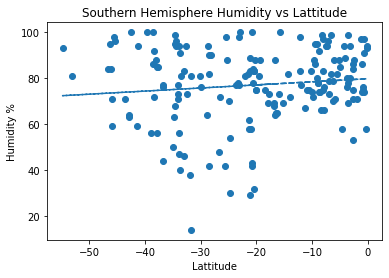

In [12]:
graph4 = plt.scatter(SouthernHemisphere_df['Lattitude'],SouthernHemisphere_df['Humidity %'])
plt.xlabel('Lattitude')
plt.ylabel('Humidity %')
plt.title('Southern Hemisphere Humidity vs Lattitude')
g4_slope, g4_int, g4_r, g4_p, g4_std_err = stats.linregress(SouthernHemisphere_df['Lattitude'],SouthernHemisphere_df['Humidity %'])
g4_fit = g4_slope * SouthernHemisphere_df['Lattitude'] + g4_int
plt.plot(SouthernHemisphere_df['Lattitude'],g4_fit,"--")

plt.savefig(savefolder + 'Southern Hemisphere Humidity vs Lattitude.jpg', dpi = 300)

plt.show()

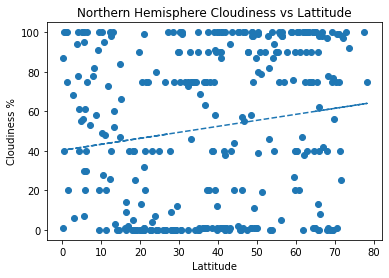

In [13]:
graph5 = plt.scatter(NorthernHemisphere_df['Lattitude'],NorthernHemisphere_df['Cloudiness %'])
plt.xlabel('Lattitude')
plt.ylabel('Cloudiness %')
plt.title('Northern Hemisphere Cloudiness vs Lattitude')
g5_slope, g5_int, g5_r, g5_p, g5_std_err = stats.linregress(NorthernHemisphere_df['Lattitude'],NorthernHemisphere_df['Cloudiness %'])
g5_fit = g5_slope * NorthernHemisphere_df['Lattitude'] + g5_int
plt.plot(NorthernHemisphere_df['Lattitude'],g5_fit,"--")

plt.savefig(savefolder + 'Northern Hemisphere Cloudiness vs Lattitude.jpg', dpi = 300)

plt.show()

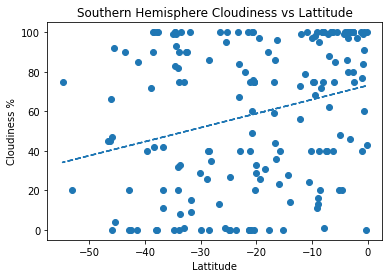

In [14]:
graph6 = plt.scatter(SouthernHemisphere_df['Lattitude'],SouthernHemisphere_df['Cloudiness %'])
plt.xlabel('Lattitude')
plt.ylabel('Cloudiness %')
plt.title('Southern Hemisphere Cloudiness vs Lattitude')
g6_slope, g6_int, g6_r, g6_p, g6_std_err = stats.linregress(SouthernHemisphere_df['Lattitude'],SouthernHemisphere_df['Cloudiness %'])
g6_fit = g6_slope * SouthernHemisphere_df['Lattitude'] + g6_int
plt.plot(SouthernHemisphere_df['Lattitude'],g6_fit,"--")

plt.savefig(savefolder + 'Southern Hemisphere Cloudiness vs Lattitude.jpg', dpi = 300)

plt.show()

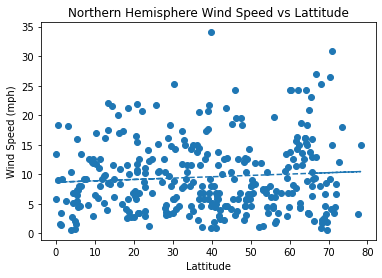

In [15]:
graph7 = plt.scatter(NorthernHemisphere_df['Lattitude'],NorthernHemisphere_df['Wind Speed (mph)'])
plt.xlabel('Lattitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere Wind Speed vs Lattitude')
g7_slope, g7_int, g7_r, g7_p, g7_std_err = stats.linregress(NorthernHemisphere_df['Lattitude'],NorthernHemisphere_df['Wind Speed (mph)'])
g7_fit = g7_slope * NorthernHemisphere_df['Lattitude'] + g7_int
plt.plot(NorthernHemisphere_df['Lattitude'],g7_fit,"--")

plt.savefig(savefolder + 'Northern Hemisphere Wind Speed vs Lattitude.jpg', dpi = 300)

plt.show()

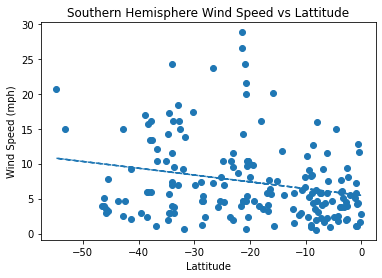

In [16]:
graph8 = plt.scatter(SouthernHemisphere_df['Lattitude'],SouthernHemisphere_df['Wind Speed (mph)'])
plt.xlabel('Lattitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere Wind Speed vs Lattitude')
g8_slope, g8_int, g8_r, g8_p, g8_std_err = stats.linregress(SouthernHemisphere_df['Lattitude'],SouthernHemisphere_df['Wind Speed (mph)'])
g8_fit = g8_slope * SouthernHemisphere_df['Lattitude'] + g8_int
plt.plot(SouthernHemisphere_df['Lattitude'],g8_fit,"--")

plt.savefig(savefolder + 'Southern Hemisphere Wind Speed vs Lattitude.jpg', dpi = 300)

plt.show()